In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, log_loss
from sklearn.model_selection import train_test_split


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab/datasets/Titanic-Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
X = df[['Age', 'Sex', 'Pclass']]
X = X.copy()
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Sex'] = X['Sex'].map({'male':1, 'female':0})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   Sex     891 non-null    int64  
 2   Pclass  891 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [6]:
X = X.values

In [7]:
Y = df[['Survived']]
print(type(Y))
Y = Y.values
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)

In [9]:
x_train.shape

(712, 3)

In [10]:
y_train.shape

(712, 1)

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train.flatten())
print(f'coef:\n{model.coef_}')
print(f'bias:\n{model.intercept_}')

coef:
[[-0.02593532 -2.47325942 -1.0348116 ]]
bias:
[4.1279562]


In [12]:
y_pred_train = model.predict(x_train)

In [13]:
log_loss(y_train, y_pred_train)

7.492220086501881

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Вариант 1 — Самый эффективный: стандартизация + более слабая регуляризация
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

model = LogisticRegression(
    C=1000,           # очень слабая регуляризация (аналог λ ≈ 0.001)
    max_iter=2000,    # на всякий случай больше итераций
    solver='lbfgs'
)

model.fit(x_train_scaled, y_train.flatten())

print("Коэффициенты:", model.coef_)
print("Смещение:   ", model.intercept_)

proba = model.predict_proba(x_train_scaled)
print("LogLoss:", log_loss(y_train, proba))

Коэффициенты: [[-0.34303149 -1.2265826  -0.87926066]]
Смещение:    [-0.68129436]
LogLoss: 0.46016017667372194


In [44]:
x_test[:5]

array([[-0.04918352,  0.79200551,  0.88742288],
       [ 0.05079242,  0.79200551, -0.25537349],
       [-0.79458411,  0.79200551,  0.88742288],
       [-1.87051787, -1.26261748, -0.25537349],
       [-1.25569858, -1.26261748,  0.88742288]])

In [43]:
x_test = scaler.fit_transform(x_test)


In [50]:
y_test.flatten().shape

(179,)

In [54]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.flatten(), y_prob)
auc_score = roc_auc_score(y_test.flatten(), y_prob)
auc = auc(fpr, tpr)

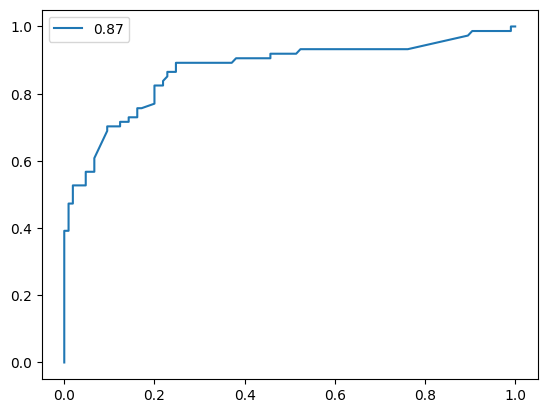

In [60]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = f'{auc_score:.2f}')
plt.legend()
plt.show()

In [58]:
print(f'{auc_score}, {auc}')

0.8712355212355214, 0.8712355212355214


In [14]:
y_pred = model.predict(x_test)
print(f'Accuracy Score:{accuracy_score(y_test.flatten(), y_pred)}')
print(f'f1_score:{f1_score(y_test.flatten(), y_pred)}')

Accuracy Score:0.8100558659217877
f1_score:0.7605633802816901


In [34]:
x_bias_train = np.c_[np.ones((x_train_scaled.shape[0], 1)), x_train_scaled]
w = np.zeros((x_bias_train.shape[1], 1))
print(x_bias_train[24:27])
print(w[:10])


[[ 1.          2.57687284 -1.38062393  0.81303367]
 [ 1.         -0.73453348  0.7243102   0.81303367]
 [ 1.          0.01239022 -1.38062393  0.81303367]]
[[0.]
 [0.]
 [0.]
 [0.]]


In [16]:
np.info(np.c_)

Translates slice objects to concatenation along the second axis.

This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

See Also
--------
column_stack : Stack 1-D arrays as columns into a 2-D array.
r_ : For more detailed documentation.

Examples
--------
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, ..., 4, 5, 6]])


In [35]:
sigmoid = lambda x: 1/(1 + np.exp(-x))
n = x_bias_train.shape[0]
eta = 0.001
lambda_ = 0.001
logloss_lst = []
for _ in range(20000):
  y_pred = sigmoid(x_bias_train @ w)
  dw = (1 / n) * x_bias_train.T @ (y_pred - y_train) + lambda_ * w
  w -= eta * dw
  logloss = -np.mean(y_train * np.log(y_pred + 1e-15) + (1 - y_train)*(np.log(1 - y_pred + 1e-15)))
  logloss_lst.append(logloss)

In [36]:
w

array([[-0.61657494],
       [-0.26874173],
       [-1.15058475],
       [-0.7654252 ]])

In [37]:
logloss_lst[0]

np.float64(0.6931471805599435)

In [38]:
max(logloss_lst)

np.float64(0.6931471805599435)

In [21]:
print(f'x_bias_train_shape{x_bias_train.shape}')
print(f'w_shape{w.shape}')

x_bias_train_shape(712, 4)
w_shape(4, 1)


In [39]:
min(logloss_lst)

np.float64(0.46142686776441166)